<a href="https://colab.research.google.com/github/ErenB02/comp_bio/blob/main/CS6405_CS3033_2425_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS3033/CS6405 - Data Mining - Second Assignment

Eren Boybay - 120446946 - CS6405

### Submission

You should submit a single .ipnyb file with your python code and analysis electronically via Canvas. Please note that this assignment will account for 25 Marks of your module grade.


### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>Physical fatigue significantly impacts performance, safety, and health in domains such as sports, rehabilitation, and workplace ergonomics. Traditional methods for estimating fatigue, such as subjective self-reports, often lack accuracy and real-time applicability. Leveraging wearable sensors like Inertial Measurement Units (IMU) and Electromyography (EMG) provides objective biomechanical data, capturing kinematic and neuromuscular changes during repetitive or prolonged physical activities.

The provided dataset was collected from 27 physically active participants performing shoulder internal rotation (IR) and external rotation (ER) exercises at varying resistance levels (30-40%, 40-50%, and 50-60% of their maximal voluntary contraction).
Your task is to develop a regression-based machine learning model to estimate perceived fatigue (Borg RPE scores) using the provided sensor data.

## Data Preparation

In [1]:
import pandas as pd

file_id = '1DP3G49DWVUaRBkn7wssPi6CfY1pTmTQP'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

df.head()

,Subject,Repetition,X_Shoulder_acc_MPSD,X_Shoulder_acc_Freq_MPSD,X_Shoulder_acc_Power_Dominant_Band,X_Shoulder_acc_Ratio_Dominant_Band,X_Shoulder_acc_Total_LowFreq_Power,X_Shoulder_acc_Total_HighFreq_Power,X_Shoulder_acc_LowHigh_FreqRatio,X_Shoulder_acc_Total_Power,...,Magnitude_Palm_gyr_rtVar_Max,Magnitude_Palm_gyr_rtVar_Min,Magnitude_Palm_gyr_rtVar_Range,Magnitude_Palm_gyr_rtVar_RMS,Magnitude_Palm_gyr_rtVar_Energy,Magnitude_Palm_gyr_rtVar_IQR,Magnitude_Palm_gyr_rtVar_Skewness,Magnitude_Palm_gyr_rtVar_Kurtosis,RepetitionDuration_Palm_gyr_rtVar,Borg
0,1,1,2068.313,0.000,0.000,0.000,2318.602,154.645,14.993,2473.247,...,0.153,-0.170,0.324,0.051,0.797,0.059,-0.465,1.233,3.10,9.355
1,1,2,150.884,0.699,150.884,0.183,503.764,322.154,1.564,825.919,...,0.148,-0.196,0.344,0.056,0.892,0.064,-0.184,0.645,2.86,9.653
2,1,3,342.205,0.000,0.000,0.000,862.122,197.057,4.375,1059.179,...,0.104,-0.107,0.211,0.040,0.479,0.051,0.007,0.133,2.99,9.946
3,1,4,574.134,0.000,0.000,0.000,1007.744,195.604,5.152,1203.347,...,0.149,-0.177,0.325,0.056,0.908,0.069,-0.240,0.136,2.91,10.240
4,1,5,146.332,1.993,146.332,0.123,826.328,364.276,2.268,1190.603,...,0.160,-0.197,0.357,0.058,1.018,0.069,-0.144,0.439,3.01,10.536


<Axes: >

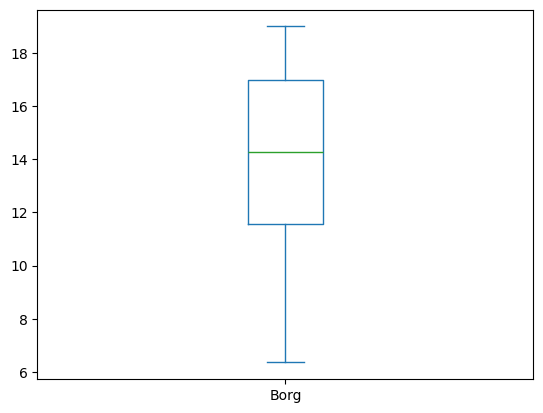

In [2]:
# Label or target variable
df['Borg'].plot.box()

# Tasks

## Basic models and evaluation

Using Scikit-learn, train and evaluate K-NN and decision tree regressors using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.
Compare the results of both classifiers and comment on their execution time in the test.


In [3]:
# YOUR CODE HERE
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split


#First we extract the features and label
X = df.loc[:, "Subject":"RepetitionDuration_Palm_gyr_rtVar"]
y = df["Borg"]

#Split the data 70/30, random_state is included for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)


#KNN Regressor
knn = neighbors.KNeighborsRegressor()

#Fit the knn regressor to training data
knn = knn.fit(X_train, y_train)

#DT Regressor
dtr = tree.DecisionTreeRegressor(random_state=2)

#Fit the decision tree regressor to training data
dtr = dtr.fit(X_train, y_train)


In [4]:
#Check the score of the regressor on test data
knn.score(X_test, y_test)

0.3413960528822876

In [5]:
#Check the score of the regressor on test data
dtr.score(X_test, y_test)

0.3896182494349537

- The prediction score of the decision tree regressor was better than the KNN model. Decision tree (DT) has an accuracy of 0.39 and the KNN with 0.34, thus in this scenario, the DT performs slighty better.

- Regarding execution times on the test, the DT also performs better when fitting and obtaining score to the test data. The DT executes in 0.009 seconds while the KNN fits in 0.255 seconds. This performance in DT can be attributed to the fact that ...

## Robust evaluation

In this section, try to improve the accuracy by creating a pipeline. Consider the techniques we have covered during the semester, and try to improve the accuracy of a Decision tree regressor.
Your report should provide concrete information of your reasoning; everything should be well-explained.
Do not get stressed if the things you try do not improve the accuracy. The key to getting good marks is to show that you evaluated different methods and that you correctly selected the configuration.


In [6]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Create pipeline
regressorDT = Pipeline([
        ('regressor', tree.DecisionTreeRegressor(random_state=2))])

#Create parameter grid
dt_param_grid = {
    "regressor__criterion": ["squared_error", "absolute_error"],
    'regressor__splitter': ['best', 'random'],
    "regressor__max_depth": [None, 3, 5],
    "regressor__min_samples_split": [2, 5]}

#Initialize GridSearchCV
dtr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error")

#Fit the GridSearchCV object to the training dataset
dtr_gs.fit(X_train, y_train)

#Upon fitting we can access the optimal parameters from the best model
print(f"Best gridsearch parameters: {dtr_gs.best_params_}, best MSE score {dtr_gs.best_score_}")


#Take the best hyperparameters from the GridSearch and use regressor pipeline
regressorDT.set_params(**dtr_gs.best_params_)
# Fit the pipeline with the training data using the best parameters found
regressorDT.fit(X_train, y_train)

#Observe training set accuracy
print(f"R squared score on train set: {regressorDT.score(X_train, y_train)}")
# Calculate the accuracy on the test set
print(f"R squared score on test set: {regressorDT.score(X_test, y_test)}")

Best gridsearch parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 5, 'regressor__min_samples_split': 5, 'regressor__splitter': 'random'}, best MSE score -4.777111684787462
R squared score on train set: 0.6412712975765836
R squared score on test set: 0.5697470166158647


In [7]:
from sklearn.decomposition import PCA


# Create pipeline with SelectKBest for feature selection
regressorDT = Pipeline([
        ('dr', PCA(n_components = 100)),
        ('regressor', tree.DecisionTreeRegressor(random_state=2))])  # Decision Tree Regressor

# Create parameter grid for GridSearchCV
dt_param_grid = {
    "regressor__criterion": ["squared_error", "absolute_error"],
    'regressor__splitter': ['best', 'random'],
    "regressor__max_depth": [None, 3, 5],
    "regressor__min_samples_split": [2, 5]}

# Initialize GridSearchCV with 'neg_mean_squared_error' for regression task
dtr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error")

# Fit the GridSearchCV object to the training dataset
dtr_gs.fit(X_train, y_train)

# Upon fitting, we can access the optimal parameters from the best model
print("Best Parameters:", dtr_gs.best_params_)
print("Best Score (Negative MSE):", dtr_gs.best_score_)

# Take the best hyperparameters from the GridSearch and update the regressor pipeline
regressorDT.set_params(**dtr_gs.best_params_)

# Fit the pipeline with the training data using the best parameters found
regressorDT.fit(X_train, y_train)

#Observe training set accuracy
print(f"R squared score on train set: {regressorDT.score(X_train, y_train)}")
# Calculate the accuracy on the test set
print(f"R squared score on test set: {regressorDT.score(X_test, y_test)}")



Best Parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__splitter': 'best'}
Best Score (Negative MSE): -9.910632299032228
R squared score on train set: 0.15030475240652186
R squared score on test set: 0.0576822726773325


In [8]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create pipeline with SelectKBest for feature selection
regressorDT = Pipeline([
        ('fs', SelectKBest(f_regression, k=50)),
        ('regressor', tree.DecisionTreeRegressor(random_state=2))])

# Create parameter grid for GridSearchCV
dt_param_grid = {
    "regressor__criterion": ["squared_error", "absolute_error"],
    'regressor__splitter': ['best', 'random'],
    "regressor__max_depth": [None, 3, 5],
    "regressor__min_samples_split": [2, 5]}

# Initialize GridSearchCV with 'neg_mean_squared_error' for regression task
dtr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error")

# Fit the GridSearchCV object to the training dataset
dtr_gs.fit(X_train, y_train)

# Upon fitting, we can access the optimal parameters from the best model
print("Best Parameters:", dtr_gs.best_params_)
print("Best Score (Negative MSE):", dtr_gs.best_score_)

# Take the best hyperparameters from the GridSearch and update the regressor pipeline
regressorDT.set_params(**dtr_gs.best_params_)

# Fit the pipeline with the training data using the best parameters found
regressorDT.fit(X_train, y_train)


#Observe training set accuracy
print(f"R squared score on train set: {regressorDT.score(X_train, y_train)}")
# Calculate the accuracy on the test set
print(f"R squared score on test set: {regressorDT.score(X_test, y_test)}")



Best Parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 3, 'regressor__min_samples_split': 2, 'regressor__splitter': 'best'}
Best Score (Negative MSE): -4.818710629412834
R squared score on train set: 0.5807372072896635
R squared score on test set: 0.5677301203289373


We will deploy a hyperparametrisation of the parameters in order to find the most optimal parameters for the model as opposed to leaving default ones as these will not be optimal for all tasks. The goal here is to find the best hyperparameters that will maximise the performance of the model on the particular dataset. Rather than tuning these hyperparameters by user-input which can result in overfitting due to over-tuning the parameters, coss-validation will be deployed particularly GridSearchCV to find the optimal hyperparameters for the model. It is crucial to create a parameter grid for GridSearchCV to access a variety of parameters to find the optimal hyperparameters for the model, however it should be noted that the grid should consist of a manageable amount of parameters to avoid increasing computational effort and overfitting. The default cv value of 3 is used, this means that the model will split the datset into five equal parts, where k-1 folds will be used for training and the final part for validation. This is repeated for every fold, thus five different test folds will be used for testing. Typically, a smaller k fold value is used for larger and high dimensional datasets, while larger folds are fold smaller datasets.

Regarding the GridSearchCV, we also define how the to evaluate the model. In this case we select 'neg_mean_squared_error' to minimize the mean squared error. This will quantify the size of the error between predictions of the model and a real output by obtaining the mean of squared differences between true target values and the predictions of the model. Again this loss will attribute greater penalties for more significant differences. GridSearchCV enables an exhaustive search over a user specified range of parameter values grid search provided by GridSearchCV exhaustively generates searches a grid of parameter values that were specified in the code above with dt_param_grid will be used to generate candidates for GridSearchCV.

The application of GridSearchCV will begin by specifying the parameter grid, followed by initialising the GridSearch object with specified scoring and pipeline object. Following this, we will fit the GridSearch to the training data and eventually fit the optimal parameters to the pipeline regressor and evaluate this model on the test set.

---
The following parameters were chosen and here is why. To begin criterion for measuring the quality of split is selected to decide what function to deploy upon calculating the quality. We have mean squared error which will emphasize more high errors and have less effect induces by smaller errors and the mean absolute error which will be robust to potential outliers and not set proportions of importance to errors of any errors. The aim of this is to reduce impurity, thus we ideally want the value of the MSE to be as close to 0 as possible for each split.

Following criterion, we have splitter parameter which determines the strategy for splitting each node. "best" will determine split in a greedy fashion while "random" will do so randomly. This can aid in reduction of overfitting

We will also include max_depth, which will determine the maximum depth of that the tree can reach. It is crucial to avoid setting this parameter to high, to avoid risk of overfitting however if set too low, the mode may not generalize well and pick up key patterns in the data.

Finally the last parameter chosen, was min_samples split which determine the minimum amount of samples that is required to split an internal node. Essentially any node that has fewer samples than the specified amount, no split will occur. This will work alongside max_depth to control the depth of the tree and enable better generalisation performance of the model due to broader and meaningful splits. Generally speaking the parameters such as max_depth and and min_split will regularise the model and reduce risk of overfitting as the model is not left to train without any constraints.

In this task, to possibly improve the accuracy of the DT regressor we can deploy dimensionality reduction, this will certainly reduce computational effort and training will be less time-consuming.

---

Additionally, the dataset consist of many features (583 rows, 2173 columns), thus the model may struggle to perform well in this high-dimensional data due to the high amount of features present in the data. One issue related to high-dimensional data refers curse of dimensionality where the effectiveness and efficiency of a model will degrade as the number of features grows. This issue can result in increased risk of overfitting, false correlations, irrelevant and redudant features, thus dimesionality reduction will be deployed to mitigate the issues described.

Principal component analysis (PCA), is a feature extraction method that will be deployed in order to deal with these issues. PCA will reduce the number of features that preserve the information and also attempt to locate the most meaningful basis to re-express the dataset. Additionally, we hope to filter out any noise and redundancy with this new basis. The dimensionality of the dataset will reduce from 2713 dimensions to 300.

The n component value for PCA should retain as much variance within the dataset as possible, additionally we ensure that the value chosen is not small to avoid oversimplifying the data resulting in the model posessing poor generalization ability and perform poorly.


***TALK ABOUT PCA PERFORMANCE***

---

***FINISH OFF BY TALKING ABOUT FEATURE SELECTION AND WHY WE HAVE IT***

- Regarding the high-dimensional data another approach dimensionality reduction approach we can take, is feature selection particularly, SelectKBest. This method will ...

- While this may not improve the score of the model, it does greatly reduce the training time and also further reduce risk of overfitting as we control the amount of noise within the data with feature selection.
---
- **NOTE THE ACCRURACIES OF THE MODELS AND DERSCIBRE WHY IT IS EITHER BETTER OR WORSE ???**

## New classifier

Replicate the previous task for a classifier that we did not cover in class (different than K-NN and decision trees). Briefly describe and justify your choice.
Try to create the best model for the given dataset.






In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import GradientBoostingRegressor


#Create pipeline
XGBoostR = Pipeline([
        ('fs', SelectKBest(f_regression, k=50)),
        ('xgb', GradientBoostingRegressor(random_state=2))])
#Create parameter grid
xgbr_param_grid = {'xgb__loss' : ['squared_error', 'absolute_error', 'huber'],
                 'xgb__criterion' : ['friedman_mse', 'squared_error'],
                 'xgb__learning_rate' : [0.01, 0.1, 0.2],
                 'xgb__n_estimators' : [100, 250, 500],
                 'xgb__max_depth': [None, 3, 5],
                 'xgb__min_samples_split': [2, 5]}

#Initialize GridSearchCV
xgbr_gs = GridSearchCV(XGBoostR, xgbr_param_grid, scoring="neg_mean_squared_error")

#Fit the GridSearchCV object to the training dataset
xgbr_gs.fit(X_train, y_train)

#Upon fitting we can access the optimal parameters from the best model
print(f"Best gridsearch parameters: {xgbr_gs.best_params_}, best MSE score {xgbr_gs.best_score_}")


#Take the best hyperparameters from the GridSearch and use regressor pipeline
XGBoostR.set_params(**xgbr_gs.best_params_)
# Fit the pipeline with the training data using the best parameters found
XGBoostR.fit(X_train, y_train)

# Calculate the accuracy on the test set
print(f"R squared score on train set: {XGBoostR.score(X_train, y_train)}")
print(f"R squared score on test set: {XGBoostR.score(X_test, y_test)}")


# - SVM ?
# - RandomForestRegressor
# - XGBoost Regressor

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import GradientBoostingRegressor


#Create pipeline
XGBoostR = Pipeline([
        ('regressor', GradientBoostingRegressor(random_state=2))])
#Create parameter grid
xgb_param_grid = {'regressor__loss' : ['squared_error', 'absolute_error', 'huber'],
                 'regressor__criterion' : ['friedman_mse', 'squared_error'],
                 'regressor__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2],
                 'regressor__n_estimators' : [100, 250, 500],
                 'regressor__max_depth': [None, 3, 5],
                 'regressor__min_samples_split': [2, 5]}

#Initialize GridSearchCV
xgbr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error")

#Fit the GridSearchCV object to the training dataset
xgbr_gs.fit(X_train, y_train)

#Upon fitting we can access the optimal parameters from the best model
print(f"Best gridsearch parameters: {xgbr_gs.best_params_}, best MSE score {xgbr_gs.best_score_}")


#Take the best hyperparameters from the GridSearch and use regressor pipeline
XGBoostR.set_params(**xgbr_gs.best_params_)
# Fit the pipeline with the training data using the best parameters found
XGBoostR.fit(X_train, y_train)

# Calculate the accuracy on the test set
print(f"R squared score on train set: {XGBoostR.score(X_train, y_train)}")
print(f"R squared score on test set: {XGBoostR.score(X_test, y_test)}")


# - SVM ?
# - RandomForestRegressor
# - XGBoost Regressor

## Evaluation on unseen instances (Only for CS6405)
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently and load all the libraries you need as well.



In [ ]:
from joblib import dump, load
from io import BytesIO
import requests
import pandas as pd

# INSERT YOUR MODEL'S URL
mLink = 'https://github.com/andvise/my_model/raw/refs/heads/main/model.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv")


In [ ]:
# YOUR CODE HERE